In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls1718 = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }

urls1617 = {'EN': 'http://www.football-data.co.uk/mmz4281/1617/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1617/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1617/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1617/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1617/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1617/N1.csv'
                          }

urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1819/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1819/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1819/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1819/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1819/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1819/N1.csv'
                          }
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1819/E0.csv'}

In [3]:
#all_data1617=get_data(urls1617)
all_data=get_data(urls)
#all_data['EN']=add_match(all_data['EN'],'Liverpool',2,'Newcastle',0)
#all_data['EN']=add_match(all_data['EN'],'Tottenham',2,'Huddersfield',0)
#all_data['EN']=add_match(all_data['EN'],'Brighton',2,'Arsenal',1)
#all_data['EN']=add_match(all_data['EN'],'Man City',1,'Chelsea',0)
#all_data['EN']=add_match(all_data['EN'],'Man United',2,'Liverpool',1)
all_data['EN'].tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
190,2018-12-29,Brighton,Everton,1,0
191,2018-12-29,Fulham,Huddersfield,1,0
192,2018-12-29,Leicester,Cardiff,0,1
193,2018-12-29,Liverpool,Arsenal,5,1
194,2018-12-29,Tottenham,Wolves,1,3
195,2018-12-29,Watford,Newcastle,1,1
196,2018-12-30,Burnley,West Ham,2,0
197,2018-12-30,Crystal Palace,Chelsea,0,1
198,2018-12-30,Man United,Bournemouth,4,1
199,2018-12-30,Southampton,Man City,1,3


In [4]:
calibrator=Calibrator('calibration.pkl')
for _country in all_data:
    calibrator.process_data(all_data[_country],_country)
teams=calibrator.teams

calibration.pkl  does not exists
('2018-10-08', 'Man United', 'Leicester', 2, 1)
('2018-11-08', 'Bournemouth', 'Cardiff', 2, 0)
('2018-11-08', 'Fulham', 'Crystal Palace', 0, 2)
('2018-11-08', 'Huddersfield', 'Chelsea', 0, 3)
('2018-11-08', 'Newcastle', 'Tottenham', 1, 2)
('2018-11-08', 'Watford', 'Brighton', 2, 0)
('2018-11-08', 'Wolves', 'Everton', 2, 2)
('2018-12-08', 'Arsenal', 'Man City', 0, 2)
('2018-12-08', 'Liverpool', 'West Ham', 4, 0)
('2018-12-08', 'Southampton', 'Burnley', 0, 0)
('2018-08-18', 'Cardiff', 'Newcastle', 0, 0)
('2018-08-18', 'Chelsea', 'Arsenal', 3, 2)
('2018-08-18', 'Everton', 'Southampton', 2, 1)
('2018-08-18', 'Leicester', 'Wolves', 2, 0)
('2018-08-18', 'Tottenham', 'Fulham', 3, 1)
('2018-08-18', 'West Ham', 'Bournemouth', 1, 2)
('2018-08-19', 'Brighton', 'Man United', 3, 2)
('2018-08-19', 'Burnley', 'Watford', 1, 3)
('2018-08-19', 'Man City', 'Huddersfield', 6, 1)
('2018-08-20', 'Crystal Palace', 'Liverpool', 0, 2)
('2018-08-25', 'Arsenal', 'West Ham', 3, 1)

In [5]:
#country='EN'
#plt.rcParams['figure.figsize']=[16,9]
#calibrator.teams['Man United'].plt()
#calibrator.teams['Home'+country].plt()
#calibrator.teams['Away'+country].plt();

In [6]:
Teams=dict()
League=dict()

In [12]:
country='EN'
lH,pH=calibrator.teams['HomeEN'].means()
lA,pA=calibrator.teams['AwayEN'].means()
home_advantage=np.array([lH-lA,pH/pA])
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage)
League[country].process_current_results(all_data[country])
League[country].simulate_season(n_scenarios=1000000)
League[country].season_report()

[0.36292543 0.95139091]
simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,99.2,92,106,1,1,95.40,100.00,5.66,0.12,0.00
Man City,88.1,80,95,3,2,4.34,99.76,6.47,0.27,0.00
Tottenham,81.8,74,90,4,2,0.23,95.52,5.37,0.32,0.00
Chelsea,78.2,70,86,5,3,0.04,85.65,4.42,0.26,0.00
Arsenal,69.8,61,78,6,4,0.00,15.02,5.21,0.47,0.00
Man United,65.6,57,74,7,5,0.00,4.01,5.23,0.45,0.00
Wolves,54.8,46,63,12,6,0.00,0.02,2.85,0.34,0.00
Everton,52.5,44,61,13,7,0.00,0.01,3.69,0.43,0.00
Leicester,52.0,44,61,13,7,0.00,0.00,2.75,0.35,0.00
Watford,51.8,43,60,13,7,0.00,0.01,3.38,0.43,0.00


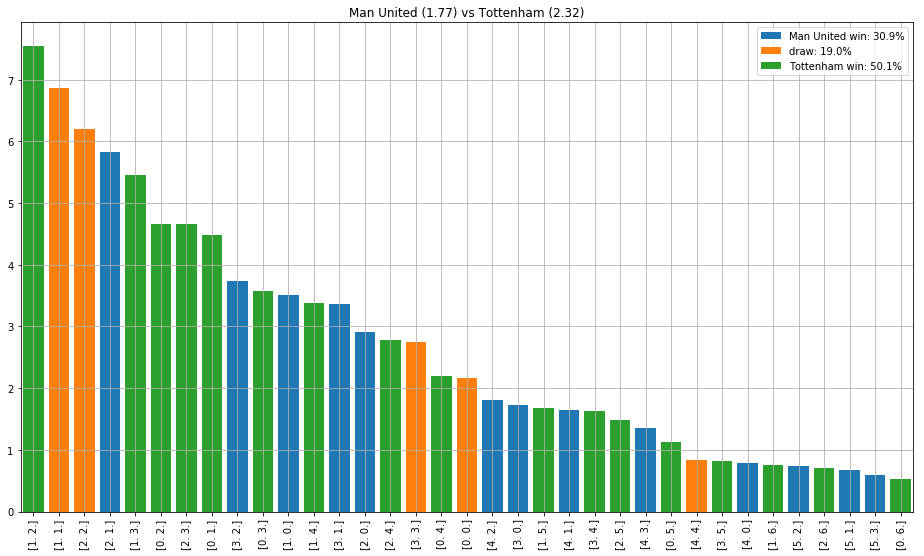

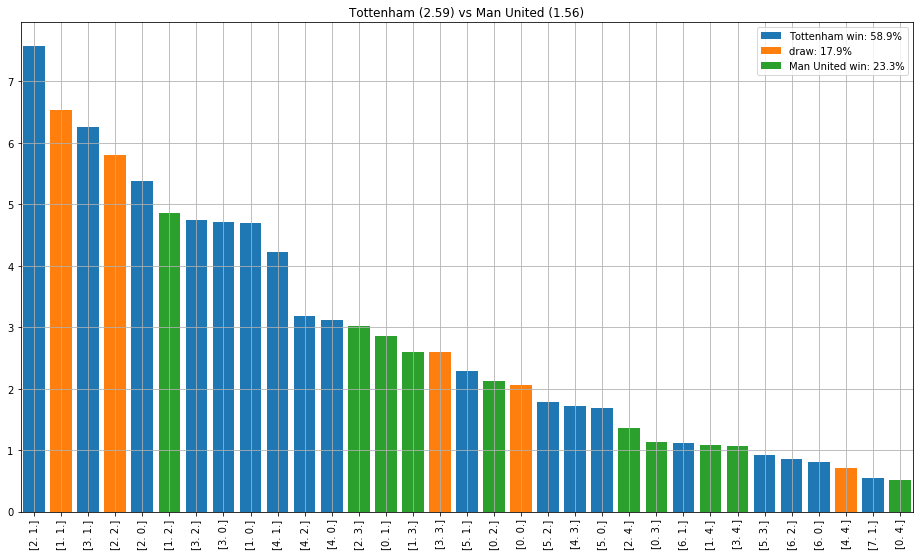

In [13]:
team1=teams['Man United']
team2=teams['Tottenham']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

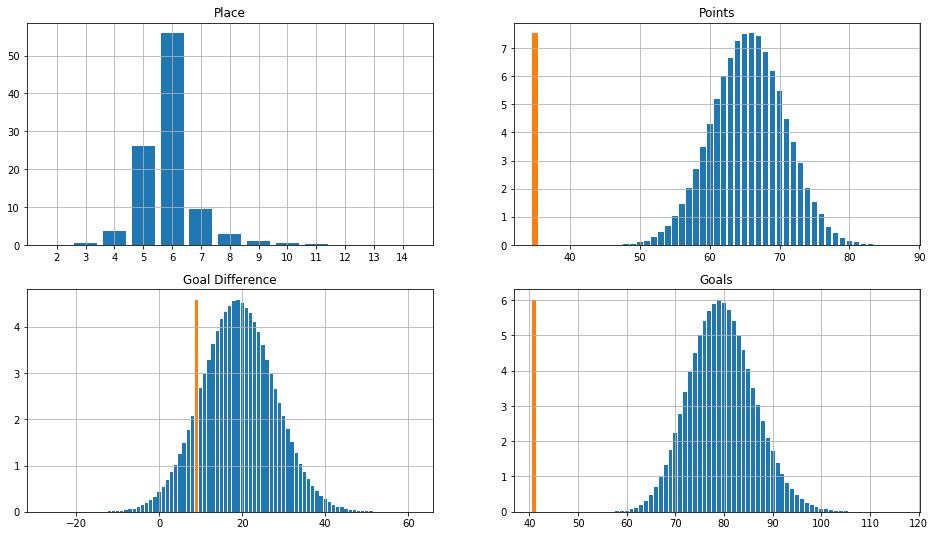

In [14]:
PremierLeague=League['EN']
PremierLeague.team_report('Man United')

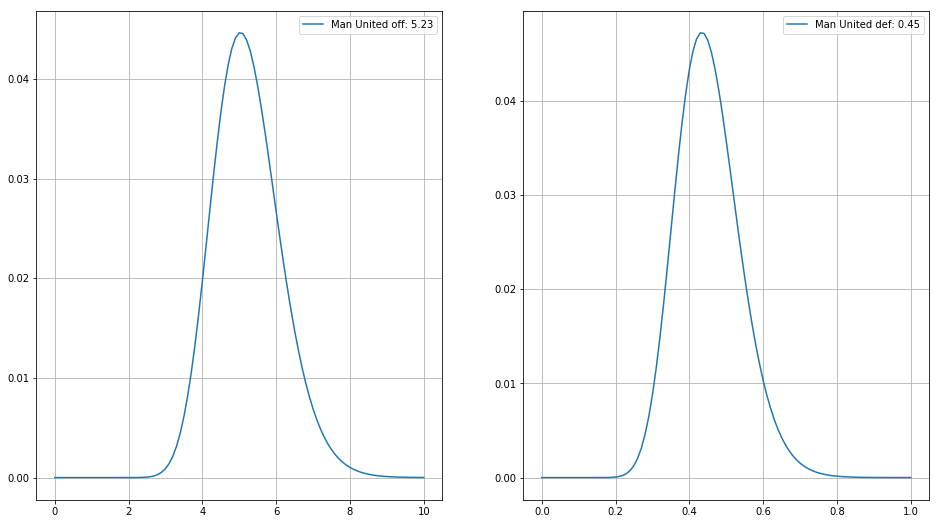

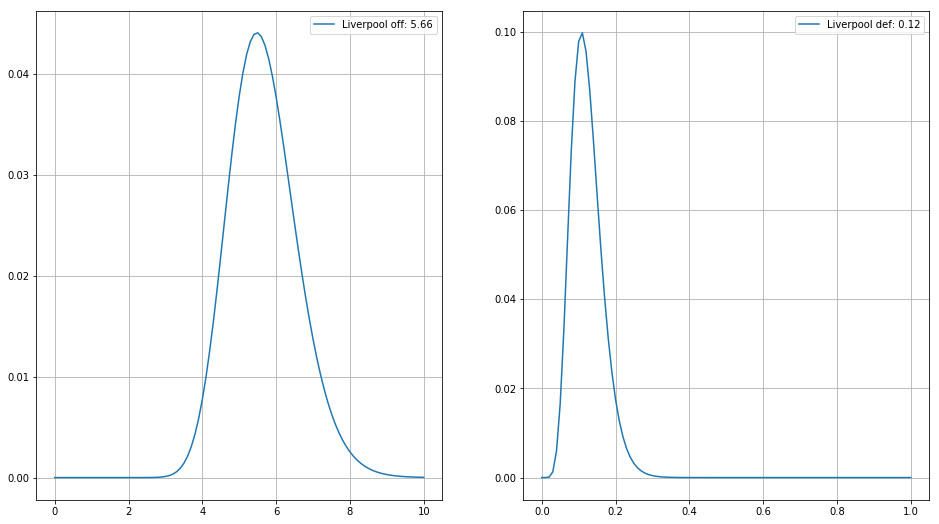

In [15]:
Teams['EN']['Man United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
Teams['EN']['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

array([4.0092    , 7.56610495, 2.84323133, 4.05903836])

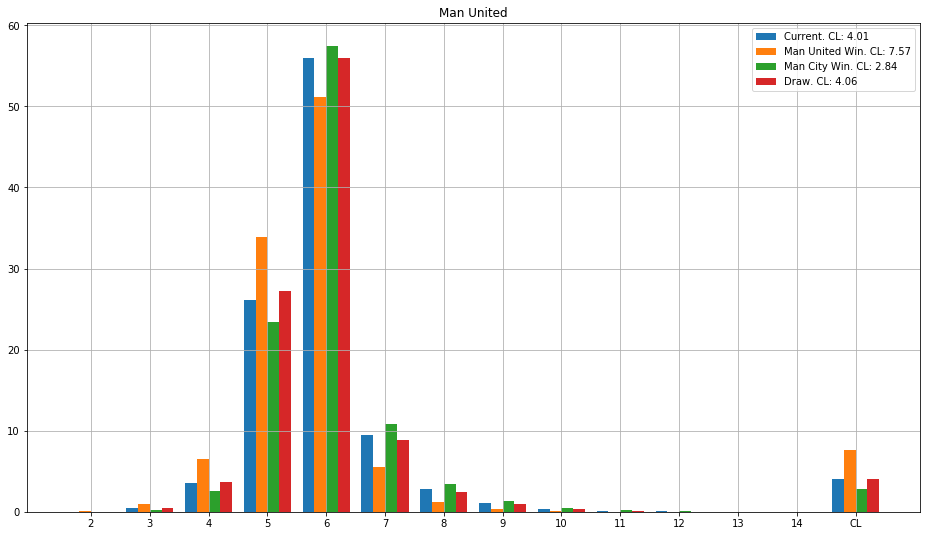

In [16]:
imp=[]
ref_team='Man United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=2,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([4.0092    , 2.45216886, 7.91208417, 4.01210818])

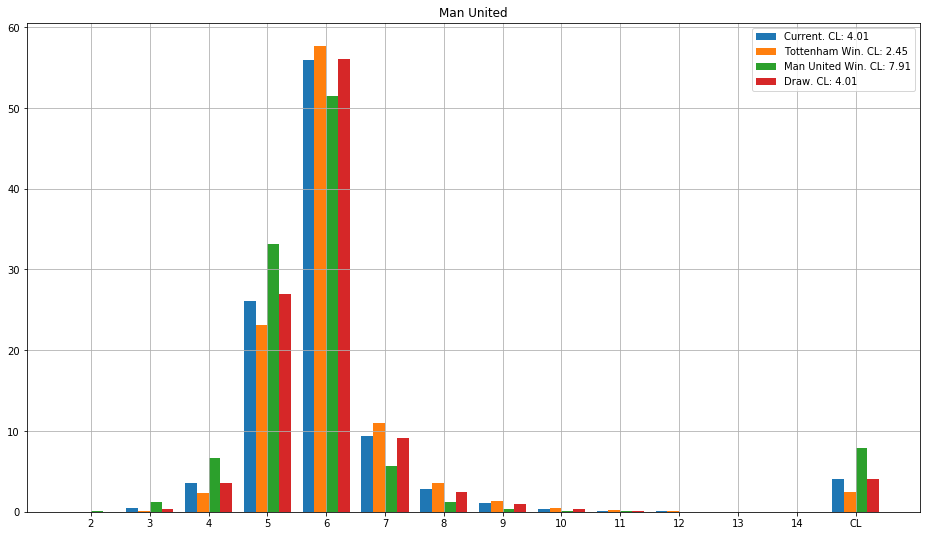

In [17]:
PremierLeague.what_if('Tottenham v Man United',ref_team='Man United')

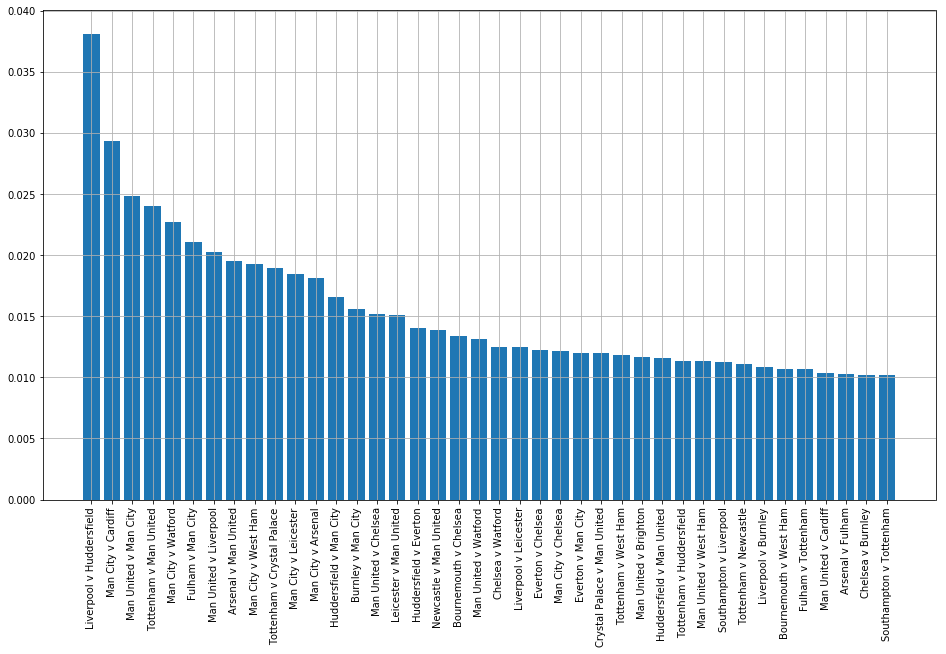

In [19]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

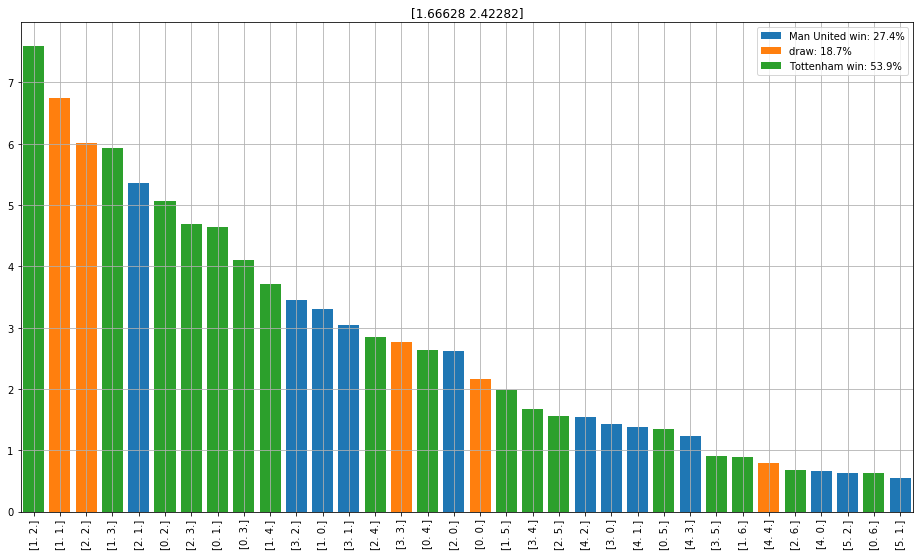

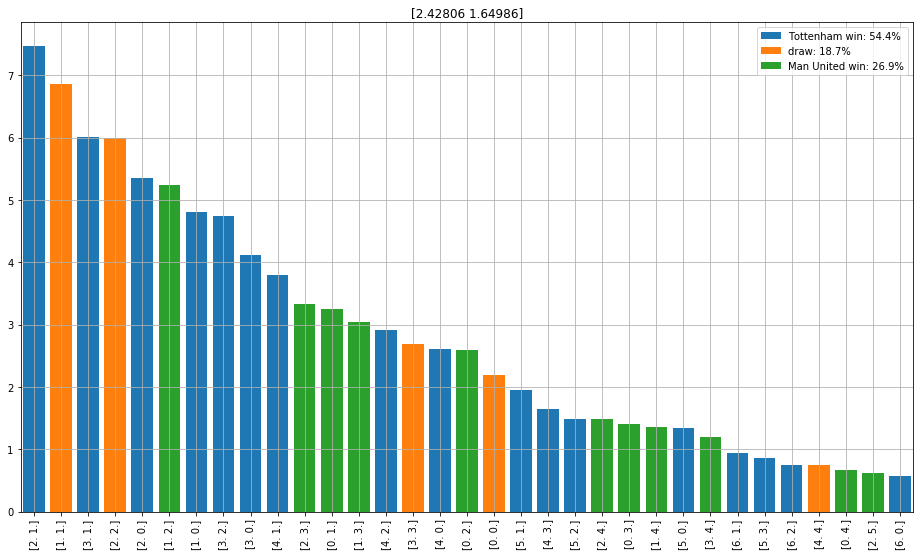

1.6307494444444446

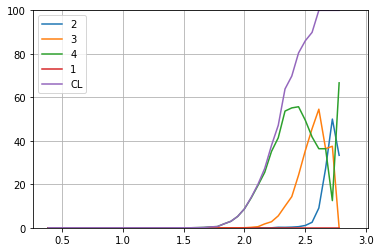

In [13]:
team_name='Man United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n